In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.


In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | conde
Processing Record 4 of Set 1 | krasnovishersk
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | ahipara
Processing Record 7 of Set 1 | lokoja
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | nuuk
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | sawakin
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | bilma
Processing Record 17 of Set 1 | berlevag
Processing Record 18 of Set 1 | la ronge
Processing Record 19 of Set 1 | santo andre
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | fortuna
Processi

Processing Record 40 of Set 4 | acajutla
Processing Record 41 of Set 4 | saint-denis
Processing Record 42 of Set 4 | victoria
Processing Record 43 of Set 4 | asau
Processing Record 44 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 45 of Set 4 | deyang
Processing Record 46 of Set 4 | nara
Processing Record 47 of Set 4 | leh
Processing Record 48 of Set 4 | sumbe
Processing Record 49 of Set 4 | greenwood
Processing Record 50 of Set 4 | svolvaer
Processing Record 1 of Set 5 | khandagayty
Processing Record 2 of Set 5 | batagay
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | jacareacanga
Processing Record 6 of Set 5 | taywarah
Processing Record 7 of Set 5 | tiznit
Processing Record 8 of Set 5 | okhotsk
Processing Record 9 of Set 5 | urdoma
Processing Record 10 of Set 5 | tabou
Processing Record 11 of Set 5 | bose
Processing Record 12 of Set 5 | constitucion
Processing Record 13 of Set 5 | ormara
Processing R

Processing Record 32 of Set 8 | poronaysk
Processing Record 33 of Set 8 | tilichiki
Processing Record 34 of Set 8 | norwich
Processing Record 35 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 36 of Set 8 | olafsvik
Processing Record 37 of Set 8 | mikhaylovka
Processing Record 38 of Set 8 | larsnes
Processing Record 39 of Set 8 | gujar khan
Processing Record 40 of Set 8 | san rafael
Processing Record 41 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 42 of Set 8 | evensk
Processing Record 43 of Set 8 | san cristobal
Processing Record 44 of Set 8 | qandahar
City not found. Skipping...
Processing Record 45 of Set 8 | bubaque
Processing Record 46 of Set 8 | bandarbeyla
Processing Record 47 of Set 8 | formosa
Processing Record 48 of Set 8 | dunayivtsi
City not found. Skipping...
Processing Record 49 of Set 8 | bondo
Processing Record 50 of Set 8 | forbes
Processing Record 1 of Set 9 | alta floresta
Processing Record 2 of Set 9 | breyten
Processing Re

Processing Record 18 of Set 12 | bargal
City not found. Skipping...
Processing Record 19 of Set 12 | batemans bay
Processing Record 20 of Set 12 | namatanai
Processing Record 21 of Set 12 | gigmoto
Processing Record 22 of Set 12 | maceio
Processing Record 23 of Set 12 | morant bay
Processing Record 24 of Set 12 | sarh
Processing Record 25 of Set 12 | port macquarie
Processing Record 26 of Set 12 | kiunga
Processing Record 27 of Set 12 | jiddah
City not found. Skipping...
Processing Record 28 of Set 12 | chernyshevskiy
Processing Record 29 of Set 12 | susangerd
Processing Record 30 of Set 12 | malindi
Processing Record 31 of Set 12 | joao pinheiro
Processing Record 32 of Set 12 | lakatoro
Processing Record 33 of Set 12 | riachao
Processing Record 34 of Set 12 | acapulco
Processing Record 35 of Set 12 | pacifica
Processing Record 36 of Set 12 | lafiagi
Processing Record 37 of Set 12 | churapcha
Processing Record 38 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 39 of S

In [19]:
len(city_data)

592

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,16.45,93,100,7.29,RU,2021-10-13 00:16:39
1,Punta Arenas,-53.1500,-70.9167,53.71,40,0,13.80,CL,2021-10-13 00:16:40
2,Conde,-7.2597,-34.9075,74.66,88,20,4.61,BR,2021-10-13 00:16:40
3,Krasnovishersk,60.4078,57.0820,36.52,94,84,3.94,RU,2021-10-13 00:16:40
4,Bluff,-46.6000,168.3333,46.24,68,100,14.14,NZ,2021-10-13 00:14:32
5,Ahipara,-35.1667,173.1667,57.85,54,90,14.20,NZ,2021-10-13 00:16:41
6,Lokoja,7.8024,6.7430,78.51,85,73,4.36,NG,2021-10-13 00:16:41
7,Nuuk,64.1835,-51.7216,34.41,93,63,10.36,GL,2021-10-13 00:14:01
8,Cape Town,-33.9258,18.4232,63.10,80,99,3.36,ZA,2021-10-13 00:12:27
9,Katsuura,35.1333,140.3000,68.02,88,100,19.86,JP,2021-10-13 00:16:42


In [33]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [34]:
city_data_df = city_data_df[new_column_order]

In [35]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-10-13 00:16:39,70.6333,147.9167,16.45,93,100,7.29
1,Punta Arenas,CL,2021-10-13 00:16:40,-53.1500,-70.9167,53.71,40,0,13.80
2,Conde,BR,2021-10-13 00:16:40,-7.2597,-34.9075,74.66,88,20,4.61
3,Krasnovishersk,RU,2021-10-13 00:16:40,60.4078,57.0820,36.52,94,84,3.94
4,Bluff,NZ,2021-10-13 00:14:32,-46.6000,168.3333,46.24,68,100,14.14


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

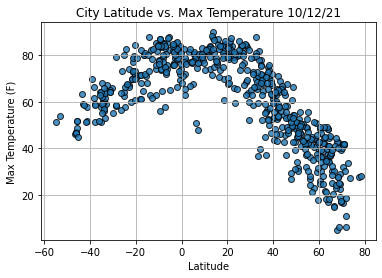

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

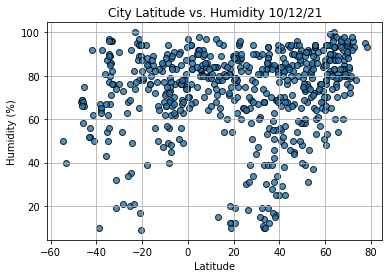

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

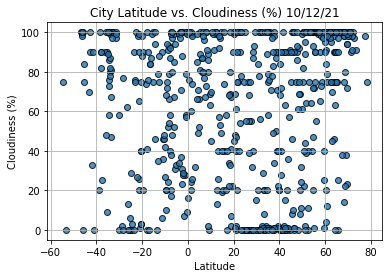

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

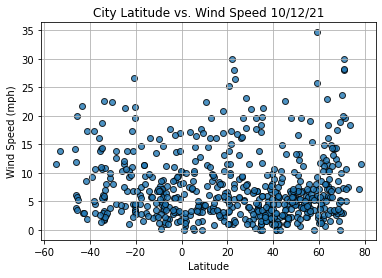

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [82]:
from scipy.stats import linregress

In [83]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [84]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

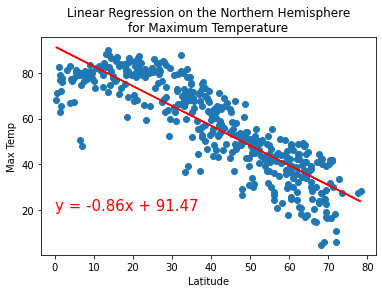

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n' 'for Maximum Temperature', 'Max Temp',(0,20))


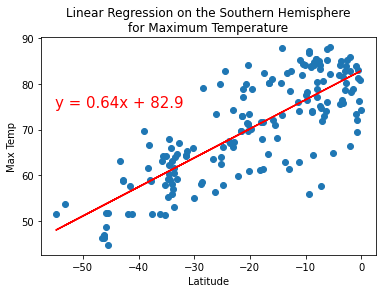

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\n" 
                        "for Maximum Temperature", 'Max Temp',(-55,75))

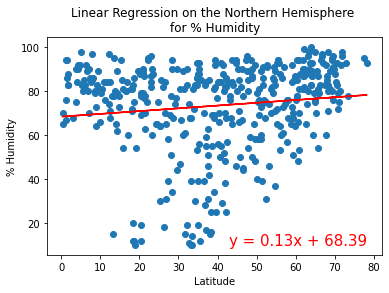

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n"
                        "for % Humidity", '% Humidity',(43,10))

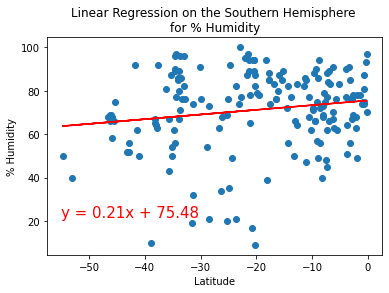

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Humidity', '% Humidity',(-55,22))

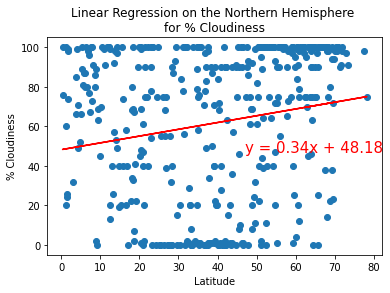

In [112]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(47,47))

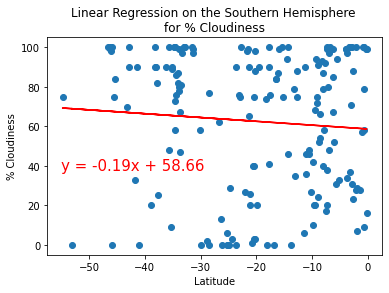

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for % Cloudiness', '% Cloudiness',(-55,38))

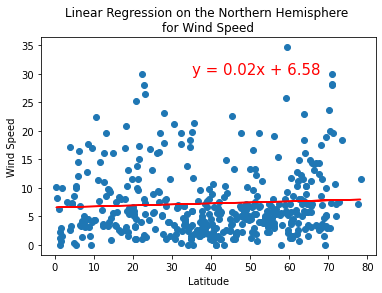

In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(35,30))

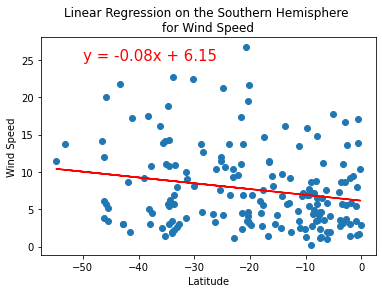

In [121]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,25))